In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

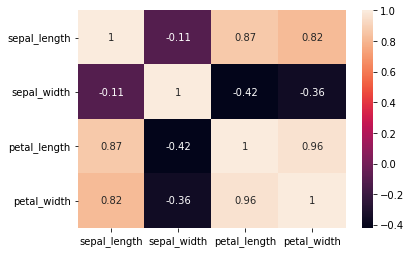

In [ ]:
corr_var=df.corr()
sns.heatmap(corr_var,annot=True)


In [ ]:
from sklearn.cluster import KMeans
wcss = []
data_new = df.drop(['species'],axis=1)

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)

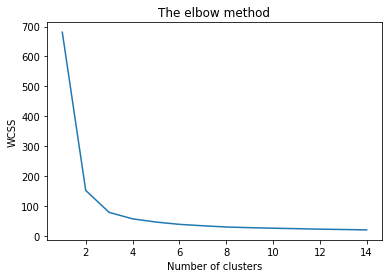

In [ ]:
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data_new)
data_new["labels"] = y_kmeans

In [ ]:
data_new

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data_new.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
data_new.tail()

,sepal_length,sepal_width,petal_length,petal_width,labels
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,0


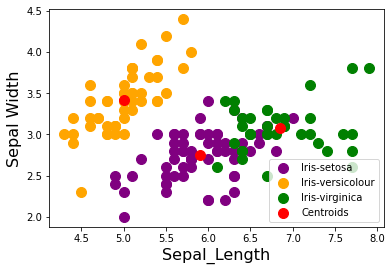

In [ ]:
#Visualising the clusters
plt.scatter(data_new.sepal_length[data_new.labels == 0], data_new.sepal_width[data_new.labels == 0], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(data_new.sepal_length[data_new.labels == 1], data_new.sepal_width[data_new.labels == 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(data_new.sepal_length[data_new.labels == 2], data_new.sepal_width[data_new.labels == 2], s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel('Sepal_Length', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print(classification_report(df['labels'],kmeans.labels_,target_names=target_names))

KeyError: ignored

In [ ]:
df1=data_new[data_new.labels==0]
df2=data_new[data_new.labels==1]
df3=data_new[data_new.labels==2]
plt.scatter(df1['sepal_length'],df1['species'],color='red',label='Cluster 0')
plt.scatter(df2['sepal_length'],df1['species'],color='black',label='Cluster 1')
plt.scatter(df3['sepal_length'],df1['species'],color='orange',label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='^',label='centroid')


KeyError: ignored